In [ ]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Prepare

Install packages and upload them

In [1]:
library("tidyverse")
library("ggplot2")
library("skimr")
library("janitor")
library("dplyr")
library("tidyr")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




Reading all csv files (last 12 months)


In [2]:
trips_2021_11 <- read.csv("../input/cyclistic-2011-11/202111-divvy-tripdata.csv")
trips_2021_12 <- read.csv("../input/cyclistic-2021-12/202112-divvy-tripdata.csv")
trips_2022_01 <- read.csv("../input/cyclistic-2022-01/202201-divvy-tripdata.csv")
trips_2022_02 <- read.csv("../input/cyclistic-2022-02/202202-divvy-tripdata.csv")
trips_2022_03 <- read.csv("../input/cyclistic-2022-03/202203-divvy-tripdata.csv")
trips_2022_04 <- read.csv("../input/cyclistic-2022-04/202204-divvy-tripdata.csv")
trips_2022_05 <- read.csv("../input/cyclistic-2022-05/202205-divvy-tripdata.csv")
trips_2022_06 <- read.csv("../input/cyclistic-2022-06/202206-divvy-tripdata.csv")
trips_2022_07 <- read.csv("../input/cyclistic-2022-07/202207-divvy-tripdata.csv")
trips_2022_08 <- read.csv("../input/cyclistic-2022-08/202208-divvy-tripdata.csv")
trips_2022_09 <- read.csv("../input/cyclistic-2022-09/202209-divvy-publictripdata.csv")
trips_2022_10 <- read.csv("../input/cyclistic-2022-10/202210-divvy-tripdata.csv")

Examining 1st and last file (first 6 rows and structure)

In [4]:
str(trips_2021_11)
head(trips_2021_11)

'data.frame':	359978 obs. of  13 variables:
 $ ride_id           : chr  "7C00A93E10556E47" "90854840DFD508BA" "0A7D10CDD144061C" "2F3BE33085BCFF02" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : chr  "2021-11-27 13:27:38" "2021-11-27 13:38:25" "2021-11-26 22:03:34" "2021-11-27 09:56:49" ...
 $ ended_at          : chr  "2021-11-27 13:46:38" "2021-11-27 13:56:10" "2021-11-26 22:05:56" "2021-11-27 10:01:50" ...
 $ start_station_name: chr  "" "" "" "" ...
 $ start_station_id  : chr  "" "" "" "" ...
 $ end_station_name  : chr  "" "" "" "" ...
 $ end_station_id    : chr  "" "" "" "" ...
 $ start_lat         : num  41.9 42 42 41.9 41.9 ...
 $ start_lng         : num  -87.7 -87.7 -87.7 -87.8 -87.6 ...
 $ end_lat           : num  42 41.9 42 41.9 41.9 ...
 $ end_lng           : num  -87.7 -87.7 -87.7 -87.8 -87.6 ...
 $ member_casual     : chr  "casual" "casual" "casual" "casual" ...


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,7C00A93E10556E47,electric_bike,2021-11-27 13:27:38,2021-11-27 13:46:38,,,,,41.93000,-87.72000,41.96,-87.73,casual
2,90854840DFD508BA,electric_bike,2021-11-27 13:38:25,2021-11-27 13:56:10,,,,,41.96000,-87.70000,41.92,-87.70,casual
3,0A7D10CDD144061C,electric_bike,2021-11-26 22:03:34,2021-11-26 22:05:56,,,,,41.96000,-87.70000,41.96,-87.70,casual
4,2F3BE33085BCFF02,electric_bike,2021-11-27 09:56:49,2021-11-27 10:01:50,,,,,41.94000,-87.79000,41.93,-87.79,casual
5,D67B4781A19928D4,electric_bike,2021-11-26 19:09:28,2021-11-26 19:30:41,,,,,41.90000,-87.63000,41.88,-87.62,casual
6,02F85C2C3C5F7D46,electric_bike,2021-11-26 18:34:07,2021-11-26 18:52:49,Michigan Ave & Oak St,13042,,,41.90086,-87.62379,41.90,-87.63,casual


In [5]:
str(trips_2022_10)
head(trips_2022_10)

'data.frame':	558685 obs. of  13 variables:
 $ ride_id           : chr  "A50255C1E17942AB" "DB692A70BD2DD4E3" "3C02727AAF60F873" "47E653FDC2D99236" ...
 $ rideable_type     : chr  "classic_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : chr  "2022-10-14 17:13:30" "2022-10-01 16:29:26" "2022-10-19 18:55:40" "2022-10-31 07:52:36" ...
 $ ended_at          : chr  "2022-10-14 17:19:39" "2022-10-01 16:49:06" "2022-10-19 19:03:30" "2022-10-31 07:58:49" ...
 $ start_station_name: chr  "Noble St & Milwaukee Ave" "Damen Ave & Charleston St" "Hoyne Ave & Balmoral Ave" "Rush St & Cedar St" ...
 $ start_station_id  : chr  "13290" "13288" "655" "KA1504000133" ...
 $ end_station_name  : chr  "Larrabee St & Division St" "Damen Ave & Cullerton St" "Western Ave & Leland Ave" "Orleans St & Chestnut St (NEXT Apts)" ...
 $ end_station_id    : chr  "KA1504000079" "13089" "TA1307000140" "620" ...
 $ start_lat         : num  41.9 41.9 42 41.9 41.9 ...
 $ start_lng         : nu

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,A50255C1E17942AB,classic_bike,2022-10-14 17:13:30,2022-10-14 17:19:39,Noble St & Milwaukee Ave,13290,Larrabee St & Division St,KA1504000079,41.90068,-87.66260,41.90349,-87.64335,member
2,DB692A70BD2DD4E3,electric_bike,2022-10-01 16:29:26,2022-10-01 16:49:06,Damen Ave & Charleston St,13288,Damen Ave & Cullerton St,13089,41.92004,-87.67794,41.85497,-87.67570,casual
3,3C02727AAF60F873,electric_bike,2022-10-19 18:55:40,2022-10-19 19:03:30,Hoyne Ave & Balmoral Ave,655,Western Ave & Leland Ave,TA1307000140,41.97988,-87.68190,41.96640,-87.68870,member
4,47E653FDC2D99236,electric_bike,2022-10-31 07:52:36,2022-10-31 07:58:49,Rush St & Cedar St,KA1504000133,Orleans St & Chestnut St (NEXT Apts),620,41.90227,-87.62769,41.89820,-87.63754,member
5,8B5407BE535159BF,classic_bike,2022-10-13 18:41:03,2022-10-13 19:26:18,900 W Harrison St,13028,Adler Planetarium,13431,41.87475,-87.64981,41.86610,-87.60727,casual
6,A177C92E9F021B99,electric_bike,2022-10-13 15:53:27,2022-10-13 15:59:17,900 W Harrison St,13028,Loomis St & Lexington St,13332,41.87472,-87.64983,41.87219,-87.66150,casual


Comparing columns to verify they are bindable

In [6]:
compare_df_cols(trips_2022_01, trips_2022_02, trips_2022_03, trips_2022_04,trips_2022_05,trips_2022_06,trips_2022_07, trips_2022_08, trips_2022_09, trips_2022_10, trips_2021_11, trips_2021_12)

column_name,trips_2022_01,trips_2022_02,trips_2022_03,trips_2022_04,trips_2022_05,trips_2022_06,trips_2022_07,trips_2022_08,trips_2022_09,trips_2022_10,trips_2021_11,trips_2021_12
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
end_lat,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric
end_lng,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric
end_station_id,character,character,character,character,character,character,character,character,character,character,character,character
end_station_name,character,character,character,character,character,character,character,character,character,character,character,character
ended_at,character,character,character,character,character,character,character,character,character,character,character,character
member_casual,character,character,character,character,character,character,character,character,character,character,character,character
ride_id,character,character,character,character,character,character,character,character,character,character,character,character
rideable_type,character,character,character,character,character,character,character,character,character,character,character,character
start_lat,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric


All files have the same columns, and all columns have the same conventions and format.

In [7]:
merged_tripdata <- bind_rows(trips_2022_01, trips_2022_02, trips_2022_03, trips_2022_04,trips_2022_05,trips_2022_06,trips_2022_07, trips_2022_08, trips_2022_09, trips_2022_10, trips_2021_11, trips_2021_12)

In [8]:
View(merged_tripdata)
glimpse(merged_tripdata)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01280,-87.66591,42.01256,-87.67437,casual
A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01276,-87.66597,42.01256,-87.67437,casual
BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.92560,-87.65371,41.92533,-87.66580,member
CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.98359,-87.66915,41.96151,-87.67139,casual
DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.87785,-87.62408,41.88462,-87.62783,member
A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.89563,-87.67207,41.90312,-87.67394,member
BDC4AB637EDF981B,classic_bike,2022-01-30 18:32:52,2022-01-30 18:49:26,Oakley Ave & Irving Park Rd,KA1504000158,Broadway & Sheridan Rd,13323,41.95434,-87.68608,41.95283,-87.64999,member
81751A3186E59A6B,classic_bike,2022-01-22 12:20:02,2022-01-22 12:32:06,Sheffield Ave & Fullerton Ave,TA1306000016,Damen Ave & Clybourn Ave,13271,41.92560,-87.65371,41.93193,-87.67786,member
154222B86A338ABD,electric_bike,2022-01-17 07:34:41,2022-01-17 08:00:08,Racine Ave & 15th St,13304,Clinton St & Washington Blvd,WL-012,41.86125,-87.65650,41.88338,-87.64117,member


Rows: 5,755,694
Columns: 13
$ ride_id            <chr> "C2F7DD78E82EC875", "A6CF8980A652D272", "BD0F91DFF7…
$ rideable_type      <chr> "electric_bike", "electric_bike", "classic_bike", "…
$ started_at         <chr> "2022-01-13 11:59:47", "2022-01-10 08:41:56", "2022…
$ ended_at           <chr> "2022-01-13 12:02:44", "2022-01-10 08:46:17", "2022…
$ start_station_name <chr> "Glenwood Ave & Touhy Ave", "Glenwood Ave & Touhy A…
$ start_station_id   <chr> "525", "525", "TA1306000016", "KA1504000151", "TA13…
$ end_station_name   <chr> "Clark St & Touhy Ave", "Clark St & Touhy Ave", "Gr…
$ end_station_id     <chr> "RP-007", "RP-007", "TA1307000001", "TA1309000021",…
$ start_lat          <dbl> 42.01280, 42.01276, 41.92560, 41.98359, 41.87785, 4…
$ start_lng          <dbl> -87.66591, -87.66597, -87.65371, -87.66915, -87.624…
$ end_lat            <dbl> 42.01256, 42.01256, 41.92533, 41.96151, 41.88462, 4…
$ end_lng            <dbl> -87.67437, -87.67437, -87.66580, -87.67139, -87.627…
$ member_cas

# Process

Changing data type of 2 varibales (started_at and ended_et) to date/time

In [9]:
merged_tripdata$started_at = strptime(merged_tripdata$started_at,"%Y-%m-%d %H:%M:%S")
merged_tripdata$ended_at = strptime(merged_tripdata$ended_at,"%Y-%m-%d %H:%M:%S")

Verifying in character columns there are no capitalized letters or misspelled categories

In [10]:
unique(merged_tripdata$rideable_type)
unique(merged_tripdata$start_station_name)
unique(merged_tripdata$start_station_id)
unique(merged_tripdata$end_station_name)
unique(merged_tripdata$end_station_id)
unique(merged_tripdata$member_casual)

[1] "electric_bike" "classic_bike"  "docked_bike"

[1] "Glenwood Ave & Touhy Ave"                                        
   [2] "Sheffield Ave & Fullerton Ave"                                   
   [3] "Clark St & Bryn Mawr Ave"                                        
   [4] "Michigan Ave & Jackson Blvd"                                     
   [5] "Wood St & Chicago Ave"                                           
   [6] "Oakley Ave & Irving Park Rd"                                     
   [7] "Racine Ave & 15th St"                                            
   [8] "LaSalle St & Jackson Blvd"                                       
   [9] "Clarendon Ave & Leland Ave"                                      
  [10] "Rush St & Superior St"                                           
  [11] "Lincoln Park Conservatory"                                       
  [12] "Sedgwick St & North Ave"                                         
  [13] "California Ave & Altgeld St"                                     
  [14] "Indiana Ave & 31st St"                                           
  [15] "Lake Park Ave & 56th St"                                         
  [16] "Sheridan Rd & Montrose Ave"                                      
  [17] "State St & Harrison St"                                          
  [18] "Halsted St & North Branch St"                                    
  [19] "Washtenaw Ave & Lawrence Ave"                                    
  [20] "University Ave & 57th St"                                        
  [21] "Halsted St & Clybourn Ave"                                       
  [22] "Clinton St & Lake St"                                            
  [23] "Evanston Civic Center"                                           
  [24] "Clinton St & Roosevelt Rd"                                       
  [25] "Damen Ave & Cortland St"                                         
  [26] "Winthrop Ave & Lawrence Ave"                                     
  [27] "Wilton Ave & Belmont Ave"                                        
  [28] "Southport Ave & Waveland Ave"                                    
  [29] "Paulina Ave & North Ave"                                         
  [30] "Halsted St & Willow St"                                          
  [31] "Clark St & Lake St"                                              
  [32] "Halsted St & Maxwell St"                                         
  [33] "Sheffield Ave & Waveland Ave"                                    
  [34] "St. Clair St & Erie St"                                          
  [35] "May St & Cullerton St"                                           
  [36] "State St & Pearson St"                                           
  [37] "Ogden Ave & Chicago Ave"                                         
  [38] "DuSable Lake Shore Dr & North Blvd"                              
  [39] "Wood St & Milwaukee Ave"                                         
  [40] "Ashland Ave & Division St"                                       
  [41] "Wells St & Huron St"                                             
  [42] "Damen Ave & Charleston St"                                       
  [43] "Michigan Ave & 14th St"                                          
  [44] "Rockwell St & Cermak Rd"                                         
  [45] "Clinton St & Jackson Blvd"                                       
  [46] "Blackstone Ave & Hyde Park Blvd"                                 
  [47] "Ashland Ave & Grace St"                                          
  [48] "Clinton St & Polk St"                                            
  [49] "Chicago Ave & Washington St"                                     
  [50] "Lincoln Ave & Belmont Ave"                                       
  [51] "Sheffield Ave & Wellington Ave"                                  
  [52] "Wabash Ave & Wacker Pl"                                          
  [53] "Millennium Park"                                                 
  [54] "Lincoln Ave & Belle Plaine Ave"                                  
  [55] 

[1] "525"                                         
   [2] "TA1306000016"                                
   [3] "KA1504000151"                                
   [4] "TA1309000002"                                
   [5] "637"                                         
   [6] "KA1504000158"                                
   [7] "13304"                                       
   [8] "TA1309000004"                                
   [9] "TA1307000119"                                
  [10] "15530"                                       
  [11] "LP-"                                         
  [12] "TA1307000038"                                
  [13] "15646"                                       
  [14] "TA1308000036"                                
  [15] "TA1309000063"                                
  [16] "TA1307000107"                                
  [17] "SL-007"                                      
  [18] "KA1504000117"                                
  [19] "KA1504000080"                                
  [20] "KA1503000071"                                
  [21] "331"                                         
  [22] "13021"                                       
  [23] "661"                                         
  [24] "WL-008"                                      
  [25] "13133"                                       
  [26] "TA1308000021"                                
  [27] "TA1307000134"                                
  [28] "13235"                                       
  [29] "TA1305000037"                                
  [30] "TA1307000166"                                
  [31] "KA1503000012"                                
  [32] "TA1309000001"                                
  [33] "TA1307000126"                                
  [34] "13016"                                       
  [35] "13331"                                       
  [36] "TA1307000061"                                
  [37] "TA1305000020"                                
  [38] "LF-005"                                      
  [39] "13221"                                       
  [40] "13061"                                       
  [41] "TA1306000012"                                
  [42] "13288"                                       
  [43] "TA1307000124"                                
  [44] "425"                                         
  [45] "638"                                         
  [46] "13398"                                       
  [47] "13319"                                       
  [48] "15542"                                       
  [49] "E002"                                        
  [50] "TA1309000042"                                
  [51] "TA1307000052"                                
  [52] "TA1307000131"                                
  [53] "13008"                                       
  [54] "TA1309000026"                                
  [55] "13196"                                       
  [56] "TA1309000025"                                
  [57] "TA1307000117"                                
  [58] "TA1305000003"                                
  [59] "TA1308000009"                                
  [60] "13432"                                       
  [61] "18062"                                       
  [62] "RN-"                                         
  [63] "KA1503000019"                                
  [64] "20257.0"                                     
  [65] "TA1307000129"                                
  [66] "15645"                                       
  [67] "13144"                                       
  [68] "TA1309000011"                                
  [69] "13247"                                       
  [70] "TA1309000027"                                
  [71] "TA1309000007"                                
  [72] "TA1308000035"                                
  [73] "TA1309000055"                                
  [74] "TA1307000136"                                
  [75] 

[1] "Clark St & Touhy Ave"                                            
   [2] "Greenview Ave & Fullerton Ave"                                   
   [3] "Paulina St & Montrose Ave"                                       
   [4] "State St & Randolph St"                                          
   [5] "Honore St & Division St"                                         
   [6] "Broadway & Sheridan Rd"                                          
   [7] "Damen Ave & Clybourn Ave"                                        
   [8] "Clinton St & Washington Blvd"                                    
   [9] "Broadway & Granville Ave"                                        
  [10] "Stockton Dr & Wrightwood Ave"                                    
  [11] "Larrabee St & Kingsbury St"                                      
  [12] "St. Clair St & Erie St"                                          
  [13] "Lincoln Park Conservatory"                                       
  [14] "Clark St & Ida B Wells Dr"                                       
  [15] "Indiana Ave & Roosevelt Rd"                                      
  [16] "Clark St & Schreiber Ave"                                        
  [17] "Michigan Ave & Washington St"                                    
  [18] "Sedgwick St & North Ave"                                         
  [19] "Milwaukee Ave & Rockwell St"                                     
  [20] "Halsted St & Roscoe St"                                          
  [21] "Wolcott Ave & Polk St"                                           
  [22] "Emerald Ave & 31st St"                                           
  [23] "Indiana Ave & 40th St"                                           
  [24] "Shore Dr & 55th St"                                              
  [25] "Ashland Ave & Wrightwood Ave"                                    
  [26] "Daley Center Plaza"                                              
  [27] "Southport Ave & Waveland Ave"                                    
  [28] "Elston Ave & Cortland St"                                        
  [29] "Clark St & Lake St"                                              
  [30] "Clark St & Chicago Ave"                                          
  [31] "Orleans St & Merchandise Mart Plaza"                             
  [32] "Clark St & Bryn Mawr Ave"                                        
  [33] "Greenview Ave & Jarvis Ave"                                      
  [34] "Western Ave & Granville Ave"                                     
  [35] "Glenwood Ave & Morse Ave"                                        
  [36] "Sedgwick St & Huron St"                                          
  [37] "Lake Park Ave & 47th St"                                         
  [38] "Southport Ave & Clybourn Ave"                                    
  [39] "Clinton St & Jackson Blvd"                                       
  [40] "Desplaines St & Jackson Blvd"                                    
  [41] "Evanston Civic Center"                                           
  [42] "State St & 35th St"                                              
  [43] "Damen Ave & Wabansia Ave"                                        
  [44] "Peoria St & Jackson Blvd"                                        
  [45] "Paulina Ave & North Ave"                                         
  [46] "Dearborn St & Adams St"                                          
  [47] "Hampden Ct & Diversey Ave"                                       
  [48] "Paulina St & Howard St"                                          
  [49] "Broadway & Ridge Ave"                                            
  [50] "Clark St & Elm St"                                               
  [51] "Glenwood Ave & Touhy Ave"                                        
  [52] "Franklin St & Monroe St"                                         
  [53] "Orleans St & Hubbard St"                                         
  [54] "State St & Pearson St"                                           
  [55] 

[1] "RP-007"                                      
   [2] "TA1307000001"                                
   [3] "TA1309000021"                                
   [4] "TA1305000029"                                
   [5] "TA1305000034"                                
   [6] "13323"                                       
   [7] "13271"                                       
   [8] "WL-012"                                      
   [9] "15571"                                       
  [10] "13276"                                       
  [11] "TA1306000009"                                
  [12] "13016"                                       
  [13] "LP-"                                         
  [14] "TA1305000009"                                
  [15] "SL-005"                                      
  [16] "KA1504000156"                                
  [17] "13001"                                       
  [18] "TA1307000038"                                
  [19] "13242"                                       
  [20] "TA1309000025"                                
  [21] "TA1309000064"                                
  [22] "TA1309000055"                                
  [23] "13083"                                       
  [24] "TA1308000009"                                
  [25] "13296"                                       
  [26] "TA1306000010"                                
  [27] "13235"                                       
  [28] "TA1305000039"                                
  [29] "KA1503000012"                                
  [30] "13303"                                       
  [31] "TA1305000022"                                
  [32] "KA1504000151"                                
  [33] "520"                                         
  [34] "KA1504000129"                                
  [35] "KA1504000175"                                
  [36] "TA1307000062"                                
  [37] "TA1308000035"                                
  [38] "TA1309000030"                                
  [39] "638"                                         
  [40] "15539"                                       
  [41] "661"                                         
  [42] "TA1307000129"                                
  [43] "20.0"                                        
  [44] "13158"                                       
  [45] "TA1305000037"                                
  [46] "TA1305000005"                                
  [47] "202480.0"                                    
  [48] "515"                                         
  [49] "15578"                                       
  [50] "TA1307000039"                                
  [51] "525"                                         
  [52] "TA1309000007"                                
  [53] "636"                                         
  [54] "TA1307000061"                                
  [55] "13091"                                       
  [56] "13325"                                       
  [57] "KA1503000069"                                
  [58] "E011"                                        
  [59] "TA1307000117"                                
  [60] "TA1307000006"                                
  [61] "KA150400009X"                                
  [62] "KA1504000079"                                
  [63] "13008"                                       
  [64] "TA1307000144"                                
  [65] "TA1307000107"                                
  [66] "13021"                                       
  [67] "596"                                         
  [68] "13257"                                       
  [69] "13138"                                       
  [70] "13285"                                       
  [71] "KA17018054"                                  
  [72] "KA1503000019"                                
  [73] "20257.0"                                     
  [74] "13085"                                       
  [75] 

[1] "casual" "member"

The columns "rideable_type" and "member_casual" have no issues.

In the stations varibales there are too many values for an eye examination. Therefore, we will sort the uniqe values and try to find misspellings.

In [11]:
sort(unique(merged_tripdata$start_station_id))

[1] ""                                            
   [2] "021320"                                      
   [3] "1011"                                        
   [4] "1012"                                        
   [5] "1013"                                        
   [6] "1014"                                        
   [7] "1015"                                        
   [8] "1016"                                        
   [9] "1018"                                        
  [10] "1019"                                        
  [11] "1020"                                        
  [12] "1021"                                        
  [13] "1023"                                        
  [14] "1027"                                        
  [15] "1028"                                        
  [16] "1029"                                        
  [17] "1030"                                        
  [18] "1031"                                        
  [19] "1032"                                        
  [20] "1033"                                        
  [21] "1034"                                        
  [22] "1036"                                        
  [23] "1038"                                        
  [24] "1039"                                        
  [25] "1040"                                        
  [26] "1045"                                        
  [27] "1046"                                        
  [28] "1047"                                        
  [29] "1048"                                        
  [30] "1050"                                        
  [31] "1052"                                        
  [32] "1053"                                        
  [33] "1054"                                        
  [34] "1055"                                        
  [35] "1056"                                        
  [36] "1057"                                        
  [37] "1058"                                        
  [38] "1060"                                        
  [39] "1061"                                        
  [40] "1062"                                        
  [41] "1063"                                        
  [42] "1065"                                        
  [43] "1066"                                        
  [44] "1067"                                        
  [45] "1068"                                        
  [46] "1069"                                        
  [47] "1070"                                        
  [48] "1072"                                        
  [49] "13001"                                       
  [50] "13006"                                       
  [51] "13008"                                       
  [52] "13011"                                       
  [53] "13016"                                       
  [54] "13017"                                       
  [55] "13021"                                       
  [56] "13022"                                       
  [57] "13028"                                       
  [58] "13029"                                       
  [59] "13033"                                       
  [60] "13034"                                       
  [61] "13036"                                       
  [62] "13037"                                       
  [63] "13042"                                       
  [64] "13045"                                       
  [65] "13050"                                       
  [66] "13053"                                       
  [67] "13056"                                       
  [68] "13058"                                       
  [69] "13059"                                       
  [70] "13061"                                       
  [71] "13063"                                       
  [72] "13068"                                       
  [73] "13071"                                       
  [74] "13073"                                       
  [75] 

We can see there is incosistency in the ids formt (some are numbers, some are letters, some are the station name and some are mix of letters and numbers.

Let's check a few of them.

In [12]:
filter(merged_tripdata, start_station_id == 'LP-')

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
7DD70C4AA0F3EA7B,classic_bike,2022-01-14 05:47:07,2022-01-14 05:47:39,Lincoln Park Conservatory,LP-,Lincoln Park Conservatory,LP-,41.92393,-87.63582,41.92393,-87.63582,member
12D2B5AA545EF922,classic_bike,2022-01-24 15:19:37,2022-01-24 15:45:27,Lincoln Park Conservatory,LP-,Michigan Ave & Washington St,13001,41.92393,-87.63582,41.88398,-87.62468,member
81B423963BA2C10C,classic_bike,2022-01-24 10:15:53,2022-01-24 10:39:53,Lincoln Park Conservatory,LP-,Daley Center Plaza,TA1306000010,41.92393,-87.63582,41.88424,-87.62963,member
46D93E743252CDAC,classic_bike,2022-01-07 14:12:09,2022-01-07 14:29:11,Lincoln Park Conservatory,LP-,Pine Grove Ave & Irving Park Rd,TA1308000022,41.92393,-87.63582,41.95438,-87.64804,casual
974FF6B488F304FB,classic_bike,2022-01-22 15:24:15,2022-01-22 15:32:08,Lincoln Park Conservatory,LP-,Sheffield Ave & Webster Ave,TA1309000033,41.92393,-87.63582,41.92154,-87.65382,member
863E234914648F13,classic_bike,2022-01-27 16:14:10,2022-01-27 16:23:36,Lincoln Park Conservatory,LP-,Clifton Ave & Armitage Ave,TA1307000163,41.92393,-87.63582,41.91822,-87.65694,member
D496F2BF2BAB3FE0,electric_bike,2022-01-15 19:44:41,2022-01-15 19:54:52,Lincoln Park Conservatory,LP-,DuSable Lake Shore Dr & North Blvd,LF-005,41.92405,-87.63592,41.91172,-87.62680,member
75EFC97AF4E26433,electric_bike,2022-01-15 19:44:40,2022-01-15 19:55:21,Lincoln Park Conservatory,LP-,DuSable Lake Shore Dr & North Blvd,LF-005,41.92402,-87.63591,41.91172,-87.62680,member
42A22DFD56732FBF,electric_bike,2022-01-16 08:09:28,2022-01-16 08:11:12,Lincoln Park Conservatory,LP-,Sedgwick St & Webster Ave,13191,41.92399,-87.63593,41.92217,-87.63889,member


In [13]:
filter(merged_tripdata, start_station_id == 'Lincoln Ave & Roscoe St - Charging')

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
3E65ADFFD18CE505,electric_bike,2022-01-20 13:05:56,2022-01-20 13:06:22,Lincoln Ave & Roscoe St - Charging,Lincoln Ave & Roscoe St - Charging,Lincoln Ave & Roscoe St - Charging,Lincoln Ave & Roscoe St - Charging,41.94306,-87.67083,41.94379,-87.67126,member
6EB72FFD126BA156,classic_bike,2022-01-20 11:56:27,2022-01-20 11:56:43,Lincoln Ave & Roscoe St - Charging,Lincoln Ave & Roscoe St - Charging,Lincoln Ave & Roscoe St - Charging,Lincoln Ave & Roscoe St - Charging,41.94379,-87.67126,41.94379,-87.67126,member
BFC5DC7EC793AF0A,electric_bike,2022-01-20 11:59:32,2022-01-20 12:00:24,Lincoln Ave & Roscoe St - Charging,Lincoln Ave & Roscoe St - Charging,Lincoln Ave & Roscoe St - Charging,Lincoln Ave & Roscoe St - Charging,41.94331,-87.67082,41.94379,-87.67126,member


In [14]:
filter(merged_tripdata, start_station_id == 'Throop/Hastings Mobile Station')

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
12805ED7C0B9303D,electric_bike,2021-11-10 12:13:21,2021-11-10 12:13:24,Throop/Hastings Mobile Station,Throop/Hastings Mobile Station,Throop/Hastings Mobile Station,Throop/Hastings Mobile Station,41.85156,-87.65911,41.85156,-87.65916,member
78333AAEE3F9177F,electric_bike,2021-11-10 12:13:31,2021-11-10 12:33:22,Throop/Hastings Mobile Station,Throop/Hastings Mobile Station,,,41.85156,-87.65916,41.85000,-87.66000,member


In [15]:
filter(merged_tripdata, start_station_id == 'Wilton Ave & Diversey Pkwy - Charging')

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
76C6AD16440C64D4,electric_bike,2022-02-09 15:56:55,2022-02-09 16:01:33,Wilton Ave & Diversey Pkwy - Charging,Wilton Ave & Diversey Pkwy - Charging,Wilton Ave & Diversey Pkwy - Charging,Wilton Ave & Diversey Pkwy - Charging,41.93230,-87.65269,41.93242,-87.65270,casual
540029D3110BB9A3,classic_bike,2022-03-23 06:45:40,2022-03-23 06:54:24,Wilton Ave & Diversey Pkwy - Charging,Wilton Ave & Diversey Pkwy - Charging,Larrabee St & Webster Ave,13193,41.93242,-87.65270,41.92182,-87.64414,member
54EB9671F6D538C6,classic_bike,2022-03-25 13:47:17,2022-03-25 13:56:02,Wilton Ave & Diversey Pkwy - Charging,Wilton Ave & Diversey Pkwy - Charging,Wilton Ave & Belmont Ave,TA1307000134,41.93242,-87.65270,41.94018,-87.65304,casual
535BD63805CC5965,electric_bike,2022-03-21 17:39:52,2022-03-21 17:54:17,Wilton Ave & Diversey Pkwy - Charging,Wilton Ave & Diversey Pkwy - Charging,Greenview Ave & Fullerton Ave,TA1307000001,41.93227,-87.65269,41.92533,-87.66580,member
A7DEC4A909D6B88C,classic_bike,2022-03-27 18:55:50,2022-03-27 19:03:53,Wilton Ave & Diversey Pkwy - Charging,Wilton Ave & Diversey Pkwy - Charging,Sheffield Ave & Willow St,TA1306000032,41.93242,-87.65270,41.91369,-87.65286,member
5AEA7589177D53DD,classic_bike,2022-03-22 19:12:22,2022-03-22 19:17:42,Wilton Ave & Diversey Pkwy - Charging,Wilton Ave & Diversey Pkwy - Charging,Sheffield Ave & Webster Ave,TA1309000033,41.93242,-87.65270,41.92154,-87.65382,member
2393F24302999195,classic_bike,2022-03-25 23:43:29,2022-03-25 23:54:50,Wilton Ave & Diversey Pkwy - Charging,Wilton Ave & Diversey Pkwy - Charging,DuSable Lake Shore Dr & Belmont Ave,TA1309000049,41.93242,-87.65270,41.94078,-87.63919,member
A25EFDB8B251726A,classic_bike,2022-03-24 19:48:41,2022-03-24 20:05:40,Wilton Ave & Diversey Pkwy - Charging,Wilton Ave & Diversey Pkwy - Charging,Damen Ave & Leland Ave,TA1307000158,41.93242,-87.65270,41.96709,-87.67903,member
1FDCFA22DDDDCBCB,classic_bike,2022-03-25 18:25:05,2022-03-25 18:32:07,Wilton Ave & Diversey Pkwy - Charging,Wilton Ave & Diversey Pkwy - Charging,Greenview Ave & Fullerton Ave,TA1307000001,41.93242,-87.65270,41.92533,-87.66580,member


In [16]:
filter(merged_tripdata, start_station_id == 'Pawel Bialowas - Test- PBSC charging station')

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
3327172413547F64,electric_bike,2022-01-14 11:13:15,2022-01-14 11:15:50,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,45.63503,-73.79648,41.8646,-87.681,casual


Let's see if there are duplicates in ride_id

In [20]:
filter(merged_tripdata, duplicated(ride_id))

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>


Calculating the ride duration in minutes

In [21]:
merged_tripdata<-mutate(merged_tripdata,ride_duration=as.numeric(round(difftime(ended_at,started_at,units="mins"), digits=2)))

In [22]:
head(merged_tripdata)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01280,-87.66591,42.01256,-87.67437,casual,2.95
2,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01276,-87.66597,42.01256,-87.67437,casual,4.35
3,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.92560,-87.65371,41.92533,-87.66580,member,4.35
4,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.98359,-87.66915,41.96151,-87.67139,casual,14.93
5,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.87785,-87.62408,41.88462,-87.62783,member,6.03
6,A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.89563,-87.67207,41.90312,-87.67394,member,3.37


Splitting started_at column to day, month, year, weekday, and start-hour

Splitting ended_at column to end-hour

In [23]:
merged_tripdata["ride_year"] <- format(merged_tripdata$started_at, "%Y")
merged_tripdata["ride_month"] <- format(merged_tripdata$started_at, "%b")
merged_tripdata["week_day"] <- format(merged_tripdata$started_at, "%a")
merged_tripdata["start_hour"] <- as.numeric(format(merged_tripdata$started_at, "%H"))
merged_tripdata["end_hour"] <- as.numeric(format(merged_tripdata$ended_at, "%H"))

In [24]:
str(merged_tripdata)
head(merged_tripdata)

'data.frame':	5755694 obs. of  19 variables:
 $ ride_id           : chr  "C2F7DD78E82EC875" "A6CF8980A652D272" "BD0F91DFF741C66D" "CBB80ED419105406" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "classic_bike" "classic_bike" ...
 $ started_at        : POSIXlt, format: "2022-01-13 11:59:47" "2022-01-10 08:41:56" ...
 $ ended_at          : POSIXlt, format: "2022-01-13 12:02:44" "2022-01-10 08:46:17" ...
 $ start_station_name: chr  "Glenwood Ave & Touhy Ave" "Glenwood Ave & Touhy Ave" "Sheffield Ave & Fullerton Ave" "Clark St & Bryn Mawr Ave" ...
 $ start_station_id  : chr  "525" "525" "TA1306000016" "KA1504000151" ...
 $ end_station_name  : chr  "Clark St & Touhy Ave" "Clark St & Touhy Ave" "Greenview Ave & Fullerton Ave" "Paulina St & Montrose Ave" ...
 $ end_station_id    : chr  "RP-007" "RP-007" "TA1307000001" "TA1309000021" ...
 $ start_lat         : num  42 42 41.9 42 41.9 ...
 $ start_lng         : num  -87.7 -87.7 -87.7 -87.7 -87.6 ...
 $ end_lat           : num 

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration,ride_year,ride_month,week_day,start_hour,end_hour
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01280,-87.66591,42.01256,-87.67437,casual,2.95,2022,Jan,Thu,11,12
2,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01276,-87.66597,42.01256,-87.67437,casual,4.35,2022,Jan,Mon,8,8
3,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.92560,-87.65371,41.92533,-87.66580,member,4.35,2022,Jan,Tue,4,4
4,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.98359,-87.66915,41.96151,-87.67139,casual,14.93,2022,Jan,Tue,0,0
5,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.87785,-87.62408,41.88462,-87.62783,member,6.03,2022,Jan,Thu,1,1
6,A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.89563,-87.67207,41.90312,-87.67394,member,3.37,2022,Jan,Tue,18,18


Calculating the ride distance in KM

In [26]:
install.packages("geosphere")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [27]:
library("geosphere")

In [28]:
merged_tripdata$ride_distance <- distGeo(matrix(c(merged_tripdata$start_lng, merged_tripdata$start_lat), ncol = 2), matrix(c(merged_tripdata$end_lng, merged_tripdata$end_lat), ncol = 2))/1000
merged_tripdata$ride_distance <- round(merged_tripdata$ride_distance, digits=2)

In [29]:
str(merged_tripdata)

'data.frame':	5755694 obs. of  20 variables:
 $ ride_id           : chr  "C2F7DD78E82EC875" "A6CF8980A652D272" "BD0F91DFF741C66D" "CBB80ED419105406" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "classic_bike" "classic_bike" ...
 $ started_at        : POSIXlt, format: "2022-01-13 11:59:47" "2022-01-10 08:41:56" ...
 $ ended_at          : POSIXlt, format: "2022-01-13 12:02:44" "2022-01-10 08:46:17" ...
 $ start_station_name: chr  "Glenwood Ave & Touhy Ave" "Glenwood Ave & Touhy Ave" "Sheffield Ave & Fullerton Ave" "Clark St & Bryn Mawr Ave" ...
 $ start_station_id  : chr  "525" "525" "TA1306000016" "KA1504000151" ...
 $ end_station_name  : chr  "Clark St & Touhy Ave" "Clark St & Touhy Ave" "Greenview Ave & Fullerton Ave" "Paulina St & Montrose Ave" ...
 $ end_station_id    : chr  "RP-007" "RP-007" "TA1307000001" "TA1309000021" ...
 $ start_lat         : num  42 42 41.9 42 41.9 ...
 $ start_lng         : num  -87.7 -87.7 -87.7 -87.7 -87.6 ...
 $ end_lat           : num 

Calculating ride average speed Km/h

In [30]:
merged_tripdata$ride_speed = c(merged_tripdata$ride_distance)/as.numeric(c(merged_tripdata$ride_duration), units="hours")
merged_tripdata$ride_speed <- round(merged_tripdata$ride_speed, digits=4)

In [31]:
summary(merged_tripdata)

   ride_id          rideable_type        started_at                 
 Length:5755694     Length:5755694     Min.   :2021-11-01 00:00:14  
 Class :character   Class :character   1st Qu.:2022-04-27 16:40:09  
 Mode  :character   Mode  :character   Median :2022-06-30 18:31:03  
                                       Mean   :2022-06-13 23:04:32  
                                       3rd Qu.:2022-08-24 19:52:19  
                                       Max.   :2022-10-31 23:59:33  
                                                                    
    ended_at                   start_station_name start_station_id  
 Min.   :2021-11-01 00:04:06   Length:5755694     Length:5755694    
 1st Qu.:2022-04-27 16:51:40   Class :character   Class :character  
 Median :2022-06-30 18:49:28   Mode  :character   Mode  :character  
 Mean   :2022-06-13 23:23:58                                        
 3rd Qu.:2022-08-24 20:10:05                                        
 Max.   :2022-11-07 04:53:58      

Examining the irregular values of ride_speed and ride_duration

In [32]:
filter(merged_tripdata, ride_speed == 'Inf')

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,⋯,end_lng,member_casual,ride_duration,ride_year,ride_month,week_day,start_hour,end_hour,ride_distance,ride_speed
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
C2E047DDF019C255,electric_bike,2022-01-18 19:25:42,2022-01-18 19:25:42,Green St & Madison St,TA1307000120,,,41.88178,-87.64861,⋯,-87.65000,member,0,2022,Jan,Tue,19,19,0.23,Inf
8D3E8E511FEB11CC,electric_bike,2022-01-21 01:05:35,2022-01-21 01:05:35,Western Ave & Winnebago Ave,13068,,,41.91553,-87.68704,⋯,-87.69000,casual,0,2022,Jan,Fri,1,1,0.55,Inf
A753A729011B4289,electric_bike,2022-01-09 10:39:48,2022-01-09 10:39:48,Clark St & Bryn Mawr Ave,KA1504000151,,,41.98357,-87.66913,⋯,-87.67000,member,0,2022,Jan,Sun,10,10,0.40,Inf
0C63D14D261205FA,electric_bike,2022-01-28 15:28:11,2022-01-28 15:28:11,Wells St & Hubbard St,TA1307000151,,,41.89017,-87.63423,⋯,-87.63000,casual,0,2022,Jan,Fri,15,15,0.35,Inf
4B0FC5ACEE52EBF9,electric_bike,2022-01-18 19:38:26,2022-01-18 19:38:26,Sheffield Ave & Wrightwood Ave,TA1309000023,,,41.92867,-87.65379,⋯,-87.65000,casual,0,2022,Jan,Tue,19,19,0.35,Inf
FA080339DCF1E51A,classic_bike,2022-02-12 15:07:50,2022-02-12 15:07:50,Michigan Ave & Ida B Wells Dr,TA1305000010,,,41.87624,-87.62443,⋯,-87.62000,casual,0,2022,Feb,Sat,15,15,0.56,Inf
2CF1A9AEEB7A2BC1,electric_bike,2022-02-17 09:39:01,2022-02-17 09:39:01,Desplaines St & Randolph St,15535,Desplaines St & Randolph St,15535,41.88460,-87.64444,⋯,-87.64457,casual,0,2022,Feb,Thu,9,9,0.01,Inf
ED243C51D5046FEA,electric_bike,2022-03-20 15:09:31,2022-03-20 15:09:31,Montrose Harbor,TA1308000012,Montrose Harbor,TA1308000012,41.96394,-87.63821,⋯,-87.63818,member,0,2022,Mar,Sun,15,15,0.01,Inf
8D4DB330D85196A4,electric_bike,2022-03-05 14:26:44,2022-03-05 14:26:44,Clark St & Lake St,KA1503000012,Clark St & Lake St,KA1503000012,41.88574,-87.63091,⋯,-87.63088,casual,0,2022,Mar,Sat,14,14,0.03,Inf


It's probably includes only rides with ride_duration=0.

Let's see if there other cases.

In [33]:
filter(merged_tripdata, ride_speed < 0)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,⋯,end_lng,member_casual,ride_duration,ride_year,ride_month,week_day,start_hour,end_hour,ride_distance,ride_speed
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
7407049C5D89A13D,electric_bike,2022-03-05 11:38:04,2022-03-05 11:37:57,Sheffield Ave & Wellington Ave,TA1307000052,Sheffield Ave & Wellington Ave,TA1307000052,41.93631,-87.65252,⋯,-87.65266,casual,-0.12,2022,Mar,Sat,11,11,0.01,-0.0833
0793C9208A64302A,electric_bike,2022-05-30 11:06:29,2022-05-30 11:06:17,Broadway & Waveland Ave,13325,,,41.94907,-87.64850,⋯,-87.65000,casual,-0.20,2022,May,Mon,11,11,0.16,-0.8000
B897BE02B21FA75E,electric_bike,2022-06-07 19:15:39,2022-06-07 17:05:37,,,Kostner Ave & North Ave,519,41.90000,-87.74000,⋯,-87.74000,casual,-130.03,2022,Jun,Tue,19,17,1.11,-0.0085
6A871510E302E8CD,electric_bike,2022-06-23 19:22:57,2022-06-23 19:21:46,,,Green St & Randolph St*,chargingstx3,41.88000,-87.65000,⋯,-87.64863,member,-1.18,2022,Jun,Thu,19,19,0.42,-0.3559
BF114472ABA0289C,electric_bike,2022-06-07 19:14:47,2022-06-07 17:05:42,Base - 2132 W Hubbard,Hubbard Bike-checking (LBS-WH-TEST),W Armitage Ave & N Sheffield Ave,20254.0,41.91783,-87.65336,⋯,-87.65000,member,-129.08,2022,Jun,Tue,19,17,0.37,-0.0029
B3BE8FE661F79405,electric_bike,2022-06-07 16:18:37,2022-06-07 16:07:28,,,Clinton St & Washington Blvd,WL-012,41.88000,-87.64000,⋯,-87.64117,member,-11.15,2022,Jun,Tue,16,16,0.39,-0.0350
EF3CCF2B05635B96,electric_bike,2022-06-07 18:47:01,2022-06-07 17:05:41,,,,,41.92000,-87.72000,⋯,-87.79000,casual,-101.33,2022,Jun,Tue,18,17,5.91,-0.0583
BBD84670E05463A9,electric_bike,2022-06-07 19:11:33,2022-06-07 17:05:24,,,,,41.92000,-87.72000,⋯,-87.72000,casual,-126.15,2022,Jun,Tue,19,17,1.11,-0.0088
9FE1805A2557C74A,electric_bike,2022-06-07 19:06:49,2022-06-07 17:09:43,,,,,41.93000,-87.76000,⋯,-87.74000,member,-117.10,2022,Jun,Tue,19,17,3.72,-0.0318


Let's see if the only cause for negative ride_speed is a negative ride_duration (hence, if there are 82 rides in which start time is later that end time).

In [34]:
filter(merged_tripdata, started_at>ended_at)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,⋯,end_lng,member_casual,ride_duration,ride_year,ride_month,week_day,start_hour,end_hour,ride_distance,ride_speed
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2D97E3C98E165D80,classic_bike,2022-03-05 11:00:57,2022-03-05 10:55:01,DuSable Lake Shore Dr & Wellington Ave,TA1307000041,DuSable Lake Shore Dr & Wellington Ave,TA1307000041,41.93669,-87.63683,⋯,-87.63683,casual,-5.93,2022,Mar,Sat,11,10,0.00,0.0000
7407049C5D89A13D,electric_bike,2022-03-05 11:38:04,2022-03-05 11:37:57,Sheffield Ave & Wellington Ave,TA1307000052,Sheffield Ave & Wellington Ave,TA1307000052,41.93631,-87.65252,⋯,-87.65266,casual,-0.12,2022,Mar,Sat,11,11,0.01,-0.0833
0793C9208A64302A,electric_bike,2022-05-30 11:06:29,2022-05-30 11:06:17,Broadway & Waveland Ave,13325,,,41.94907,-87.64850,⋯,-87.65000,casual,-0.20,2022,May,Mon,11,11,0.16,-0.8000
B897BE02B21FA75E,electric_bike,2022-06-07 19:15:39,2022-06-07 17:05:37,,,Kostner Ave & North Ave,519,41.90000,-87.74000,⋯,-87.74000,casual,-130.03,2022,Jun,Tue,19,17,1.11,-0.0085
072E947E156D142D,electric_bike,2022-06-07 19:14:46,2022-06-07 17:07:45,W Armitage Ave & N Sheffield Ave,20254.0,W Armitage Ave & N Sheffield Ave,20254.0,41.92000,-87.65000,⋯,-87.65000,casual,-127.02,2022,Jun,Tue,19,17,0.00,0.0000
6A871510E302E8CD,electric_bike,2022-06-23 19:22:57,2022-06-23 19:21:46,,,Green St & Randolph St*,chargingstx3,41.88000,-87.65000,⋯,-87.64863,member,-1.18,2022,Jun,Thu,19,19,0.42,-0.3559
BF114472ABA0289C,electric_bike,2022-06-07 19:14:47,2022-06-07 17:05:42,Base - 2132 W Hubbard,Hubbard Bike-checking (LBS-WH-TEST),W Armitage Ave & N Sheffield Ave,20254.0,41.91783,-87.65336,⋯,-87.65000,member,-129.08,2022,Jun,Tue,19,17,0.37,-0.0029
B3BE8FE661F79405,electric_bike,2022-06-07 16:18:37,2022-06-07 16:07:28,,,Clinton St & Washington Blvd,WL-012,41.88000,-87.64000,⋯,-87.64117,member,-11.15,2022,Jun,Tue,16,16,0.39,-0.0350
EF3CCF2B05635B96,electric_bike,2022-06-07 18:47:01,2022-06-07 17:05:41,,,,,41.92000,-87.72000,⋯,-87.79000,casual,-101.33,2022,Jun,Tue,18,17,5.91,-0.0583


We can see that there are 112 rides with an error that should be excluded from the final cleaned dataset.

In [35]:
merged_tripdata <- mutate(merged_tripdata,to_exclude=(ride_duration < 0))

In [36]:
filter(merged_tripdata, ride_duration < 0)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,⋯,member_casual,ride_duration,ride_year,ride_month,week_day,start_hour,end_hour,ride_distance,ride_speed,to_exclude
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
2D97E3C98E165D80,classic_bike,2022-03-05 11:00:57,2022-03-05 10:55:01,DuSable Lake Shore Dr & Wellington Ave,TA1307000041,DuSable Lake Shore Dr & Wellington Ave,TA1307000041,41.93669,-87.63683,⋯,casual,-5.93,2022,Mar,Sat,11,10,0.00,0.0000,TRUE
7407049C5D89A13D,electric_bike,2022-03-05 11:38:04,2022-03-05 11:37:57,Sheffield Ave & Wellington Ave,TA1307000052,Sheffield Ave & Wellington Ave,TA1307000052,41.93631,-87.65252,⋯,casual,-0.12,2022,Mar,Sat,11,11,0.01,-0.0833,TRUE
0793C9208A64302A,electric_bike,2022-05-30 11:06:29,2022-05-30 11:06:17,Broadway & Waveland Ave,13325,,,41.94907,-87.64850,⋯,casual,-0.20,2022,May,Mon,11,11,0.16,-0.8000,TRUE
B897BE02B21FA75E,electric_bike,2022-06-07 19:15:39,2022-06-07 17:05:37,,,Kostner Ave & North Ave,519,41.90000,-87.74000,⋯,casual,-130.03,2022,Jun,Tue,19,17,1.11,-0.0085,TRUE
072E947E156D142D,electric_bike,2022-06-07 19:14:46,2022-06-07 17:07:45,W Armitage Ave & N Sheffield Ave,20254.0,W Armitage Ave & N Sheffield Ave,20254.0,41.92000,-87.65000,⋯,casual,-127.02,2022,Jun,Tue,19,17,0.00,0.0000,TRUE
6A871510E302E8CD,electric_bike,2022-06-23 19:22:57,2022-06-23 19:21:46,,,Green St & Randolph St*,chargingstx3,41.88000,-87.65000,⋯,member,-1.18,2022,Jun,Thu,19,19,0.42,-0.3559,TRUE
BF114472ABA0289C,electric_bike,2022-06-07 19:14:47,2022-06-07 17:05:42,Base - 2132 W Hubbard,Hubbard Bike-checking (LBS-WH-TEST),W Armitage Ave & N Sheffield Ave,20254.0,41.91783,-87.65336,⋯,member,-129.08,2022,Jun,Tue,19,17,0.37,-0.0029,TRUE
B3BE8FE661F79405,electric_bike,2022-06-07 16:18:37,2022-06-07 16:07:28,,,Clinton St & Washington Blvd,WL-012,41.88000,-87.64000,⋯,member,-11.15,2022,Jun,Tue,16,16,0.39,-0.0350,TRUE
EF3CCF2B05635B96,electric_bike,2022-06-07 18:47:01,2022-06-07 17:05:41,,,,,41.92000,-87.72000,⋯,casual,-101.33,2022,Jun,Tue,18,17,5.91,-0.0583,TRUE


Let's check if there are more irregularities.

In [37]:
filter(merged_tripdata, ride_speed == 0)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,⋯,member_casual,ride_duration,ride_year,ride_month,week_day,start_hour,end_hour,ride_distance,ride_speed,to_exclude
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
7DD70C4AA0F3EA7B,classic_bike,2022-01-14 05:47:07,2022-01-14 05:47:39,Lincoln Park Conservatory,LP-,Lincoln Park Conservatory,LP-,41.92393,-87.63582,⋯,member,0.53,2022,Jan,Fri,5,5,0,0,FALSE
1A185AF405E7B2DB,classic_bike,2022-01-13 12:47:10,2022-01-13 13:10:20,Sedgwick St & North Ave,TA1307000038,Sedgwick St & North Ave,TA1307000038,41.91139,-87.63868,⋯,member,23.17,2022,Jan,Thu,12,13,0,0,FALSE
060598F8DA7E017B,classic_bike,2022-01-26 15:53:41,2022-01-26 15:55:12,Evanston Civic Center,661,Evanston Civic Center,661,42.05704,-87.68655,⋯,member,1.52,2022,Jan,Wed,15,15,0,0,FALSE
3505407FC37505BB,classic_bike,2022-01-01 12:58:40,2022-01-01 13:07:35,Paulina Ave & North Ave,TA1305000037,Paulina Ave & North Ave,TA1305000037,41.90985,-87.66993,⋯,member,8.92,2022,Jan,Sat,12,13,0,0,FALSE
64CA42FCA02E5148,classic_bike,2022-01-12 14:37:54,2022-01-12 14:38:07,State St & Pearson St,TA1307000061,State St & Pearson St,TA1307000061,41.89745,-87.62872,⋯,member,0.22,2022,Jan,Wed,14,14,0,0,FALSE
3853584C874661D8,classic_bike,2022-01-21 14:36:40,2022-01-21 15:07:40,Millennium Park,13008,Millennium Park,13008,41.88103,-87.62408,⋯,casual,31.00,2022,Jan,Fri,14,15,0,0,FALSE
510D0642DBE2A1C8,docked_bike,2022-01-15 13:47:41,2022-01-15 13:50:50,Clinton St & Lake St,13021,Clinton St & Lake St,13021,41.88564,-87.64182,⋯,casual,3.15,2022,Jan,Sat,13,13,0,0,FALSE
240551343C458D08,classic_bike,2022-01-02 14:25:56,2022-01-02 15:15:46,Shore Dr & 55th St,TA1308000009,Shore Dr & 55th St,TA1308000009,41.79521,-87.58071,⋯,member,49.83,2022,Jan,Sun,14,15,0,0,FALSE
22096565E8AF075C,classic_bike,2022-01-14 16:10:37,2022-01-14 16:10:45,Clinton St & Lake St,13021,Clinton St & Lake St,13021,41.88564,-87.64182,⋯,member,0.13,2022,Jan,Fri,16,16,0,0,FALSE


As we can see, there are 347,303 rides in which the rider had ended at his strating point. 

Let's see how many rides were ended in less than 1 minute.

In [38]:
filter(merged_tripdata, ride_distance == 0 & ride_duration < 1 & ride_duration > 0)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,⋯,member_casual,ride_duration,ride_year,ride_month,week_day,start_hour,end_hour,ride_distance,ride_speed,to_exclude
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
7DD70C4AA0F3EA7B,classic_bike,2022-01-14 05:47:07,2022-01-14 05:47:39,Lincoln Park Conservatory,LP-,Lincoln Park Conservatory,LP-,41.92393,-87.63582,⋯,member,0.53,2022,Jan,Fri,5,5,0,0,FALSE
64CA42FCA02E5148,classic_bike,2022-01-12 14:37:54,2022-01-12 14:38:07,State St & Pearson St,TA1307000061,State St & Pearson St,TA1307000061,41.89745,-87.62872,⋯,member,0.22,2022,Jan,Wed,14,14,0,0,FALSE
22096565E8AF075C,classic_bike,2022-01-14 16:10:37,2022-01-14 16:10:45,Clinton St & Lake St,13021,Clinton St & Lake St,13021,41.88564,-87.64182,⋯,member,0.13,2022,Jan,Fri,16,16,0,0,FALSE
DB3BD626BB3253C9,classic_bike,2022-01-02 07:27:56,2022-01-02 07:28:00,Lincoln Ave & Waveland Ave,13253,Lincoln Ave & Waveland Ave,13253,41.94880,-87.67528,⋯,member,0.07,2022,Jan,Sun,7,7,0,0,FALSE
B0F160012485900B,classic_bike,2022-01-10 07:28:27,2022-01-10 07:28:28,Financial Pl & Ida B Wells Dr,SL-010,Financial Pl & Ida B Wells Dr,SL-010,41.87502,-87.63309,⋯,member,0.02,2022,Jan,Mon,7,7,0,0,FALSE
02DFA017BD04E1B0,classic_bike,2022-01-14 19:51:09,2022-01-14 19:51:11,Western Ave & 21st St,13091,Western Ave & 21st St,13091,41.85411,-87.68584,⋯,member,0.03,2022,Jan,Fri,19,19,0,0,FALSE
13F048AECD77625B,classic_bike,2022-01-22 13:21:32,2022-01-22 13:22:13,Michigan Ave & Jackson Blvd,TA1309000002,Michigan Ave & Jackson Blvd,TA1309000002,41.87785,-87.62408,⋯,casual,0.68,2022,Jan,Sat,13,13,0,0,FALSE
96069A736600ED71,classic_bike,2022-01-25 15:10:48,2022-01-25 15:11:01,Halsted St & Willow St,TA1307000166,Halsted St & Willow St,TA1307000166,41.91387,-87.64875,⋯,member,0.22,2022,Jan,Tue,15,15,0,0,FALSE
2EBA59153BFC41A1,classic_bike,2022-01-25 09:00:41,2022-01-25 09:00:49,Clinton St & Lake St,13021,Clinton St & Lake St,13021,41.88564,-87.64182,⋯,member,0.13,2022,Jan,Tue,9,9,0,0,FALSE


We can assume that these 78,391 rides are "failed rides". Riders were probably had an app problem or any other issue that prevented them from using cyclistic services. 

We don't want to loose the data, but rather trying to see if there's a ptern false rides. Therefor, we'll add the variable "failed_ride"

In [39]:
merged_tripdata <- mutate(merged_tripdata,failed_ride=(ride_distance == 0 & ride_duration < 1 & ride_duration > 0))

In [41]:
filter(merged_tripdata, failed_ride == 'TRUE')

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,⋯,ride_duration,ride_year,ride_month,week_day,start_hour,end_hour,ride_distance,ride_speed,to_exclude,failed_ride
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
7DD70C4AA0F3EA7B,classic_bike,2022-01-14 05:47:07,2022-01-14 05:47:39,Lincoln Park Conservatory,LP-,Lincoln Park Conservatory,LP-,41.92393,-87.63582,⋯,0.53,2022,Jan,Fri,5,5,0,0,FALSE,TRUE
64CA42FCA02E5148,classic_bike,2022-01-12 14:37:54,2022-01-12 14:38:07,State St & Pearson St,TA1307000061,State St & Pearson St,TA1307000061,41.89745,-87.62872,⋯,0.22,2022,Jan,Wed,14,14,0,0,FALSE,TRUE
22096565E8AF075C,classic_bike,2022-01-14 16:10:37,2022-01-14 16:10:45,Clinton St & Lake St,13021,Clinton St & Lake St,13021,41.88564,-87.64182,⋯,0.13,2022,Jan,Fri,16,16,0,0,FALSE,TRUE
DB3BD626BB3253C9,classic_bike,2022-01-02 07:27:56,2022-01-02 07:28:00,Lincoln Ave & Waveland Ave,13253,Lincoln Ave & Waveland Ave,13253,41.94880,-87.67528,⋯,0.07,2022,Jan,Sun,7,7,0,0,FALSE,TRUE
B0F160012485900B,classic_bike,2022-01-10 07:28:27,2022-01-10 07:28:28,Financial Pl & Ida B Wells Dr,SL-010,Financial Pl & Ida B Wells Dr,SL-010,41.87502,-87.63309,⋯,0.02,2022,Jan,Mon,7,7,0,0,FALSE,TRUE
02DFA017BD04E1B0,classic_bike,2022-01-14 19:51:09,2022-01-14 19:51:11,Western Ave & 21st St,13091,Western Ave & 21st St,13091,41.85411,-87.68584,⋯,0.03,2022,Jan,Fri,19,19,0,0,FALSE,TRUE
13F048AECD77625B,classic_bike,2022-01-22 13:21:32,2022-01-22 13:22:13,Michigan Ave & Jackson Blvd,TA1309000002,Michigan Ave & Jackson Blvd,TA1309000002,41.87785,-87.62408,⋯,0.68,2022,Jan,Sat,13,13,0,0,FALSE,TRUE
96069A736600ED71,classic_bike,2022-01-25 15:10:48,2022-01-25 15:11:01,Halsted St & Willow St,TA1307000166,Halsted St & Willow St,TA1307000166,41.91387,-87.64875,⋯,0.22,2022,Jan,Tue,15,15,0,0,FALSE,TRUE
2EBA59153BFC41A1,classic_bike,2022-01-25 09:00:41,2022-01-25 09:00:49,Clinton St & Lake St,13021,Clinton St & Lake St,13021,41.88564,-87.64182,⋯,0.13,2022,Jan,Tue,9,9,0,0,FALSE,TRUE


Checking for outliers in first and last stations by scatter plot. 

The outliers will be excluded along with rides with negative duration. 

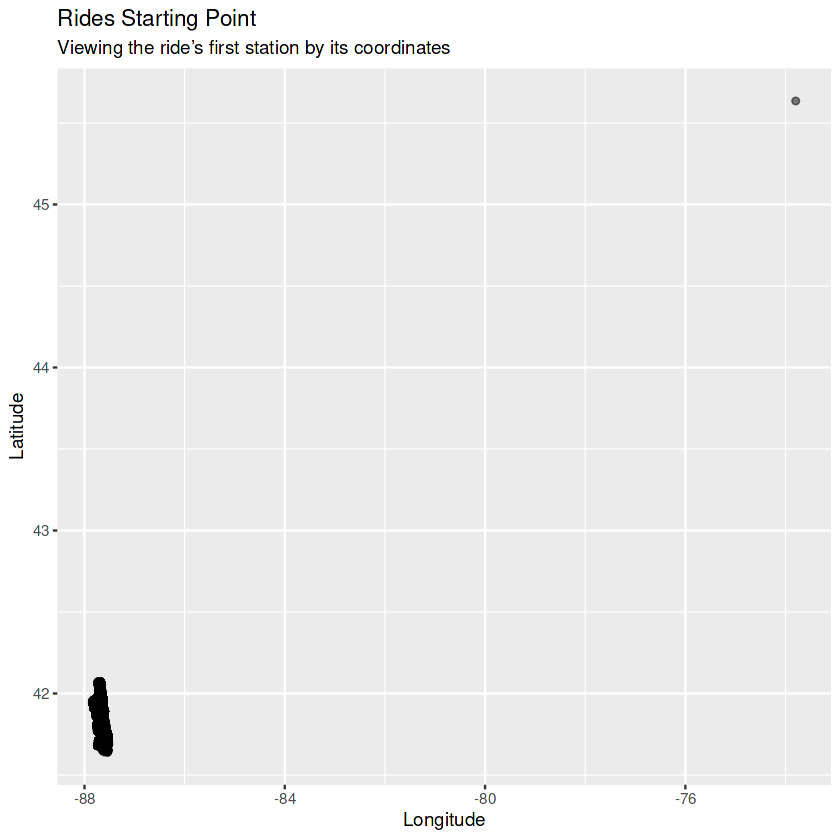

In [42]:
ggplot(merged_tripdata) +
geom_point(mapping=aes(x = start_lng, y = start_lat), alpha = .5) +
labs(title="Rides Starting Point", subtitle="Viewing the ride’s first station by its coordinates", x="Longitude", y="Latitude")

There is 1 outlier in starting station.

Let's see it's values.

In [43]:
filter(merged_tripdata, start_lng > -76)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,⋯,ride_duration,ride_year,ride_month,week_day,start_hour,end_hour,ride_distance,ride_speed,to_exclude,failed_ride
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
3327172413547F64,electric_bike,2022-01-14 11:13:15,2022-01-14 11:15:50,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,45.63503,-73.79648,⋯,2.58,2022,Jan,Fri,11,11,1192.25,462.1124,FALSE,FALSE


It's an outlier in speed (the duration is very low).

We will add this case to the final cleaning process.

We see that the outlier is in a "Test" station.

Let's see if we have more rides starting or ending there.

In [44]:
filter(merged_tripdata, start_station_id=='Pawel Bialowas - Test- PBSC charging station')

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,⋯,ride_duration,ride_year,ride_month,week_day,start_hour,end_hour,ride_distance,ride_speed,to_exclude,failed_ride
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
3327172413547F64,electric_bike,2022-01-14 11:13:15,2022-01-14 11:15:50,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,45.63503,-73.79648,⋯,2.58,2022,Jan,Fri,11,11,1192.25,462.1124,FALSE,FALSE


All is good, there's only one ride.

In [45]:
merged_tripdata <- mutate(merged_tripdata,to_exclude=(ride_duration < 0 | start_lng > -76))

In [46]:
filter(merged_tripdata, ride_duration < 0 | start_lng > -76)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,⋯,ride_duration,ride_year,ride_month,week_day,start_hour,end_hour,ride_distance,ride_speed,to_exclude,failed_ride
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
3327172413547F64,electric_bike,2022-01-14 11:13:15,2022-01-14 11:15:50,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,45.63503,-73.79648,⋯,2.58,2022,Jan,Fri,11,11,1192.25,462.1124,TRUE,FALSE
2D97E3C98E165D80,classic_bike,2022-03-05 11:00:57,2022-03-05 10:55:01,DuSable Lake Shore Dr & Wellington Ave,TA1307000041,DuSable Lake Shore Dr & Wellington Ave,TA1307000041,41.93669,-87.63683,⋯,-5.93,2022,Mar,Sat,11,10,0.00,0.0000,TRUE,FALSE
7407049C5D89A13D,electric_bike,2022-03-05 11:38:04,2022-03-05 11:37:57,Sheffield Ave & Wellington Ave,TA1307000052,Sheffield Ave & Wellington Ave,TA1307000052,41.93631,-87.65252,⋯,-0.12,2022,Mar,Sat,11,11,0.01,-0.0833,TRUE,FALSE
0793C9208A64302A,electric_bike,2022-05-30 11:06:29,2022-05-30 11:06:17,Broadway & Waveland Ave,13325,,,41.94907,-87.64850,⋯,-0.20,2022,May,Mon,11,11,0.16,-0.8000,TRUE,FALSE
B897BE02B21FA75E,electric_bike,2022-06-07 19:15:39,2022-06-07 17:05:37,,,Kostner Ave & North Ave,519,41.90000,-87.74000,⋯,-130.03,2022,Jun,Tue,19,17,1.11,-0.0085,TRUE,FALSE
072E947E156D142D,electric_bike,2022-06-07 19:14:46,2022-06-07 17:07:45,W Armitage Ave & N Sheffield Ave,20254.0,W Armitage Ave & N Sheffield Ave,20254.0,41.92000,-87.65000,⋯,-127.02,2022,Jun,Tue,19,17,0.00,0.0000,TRUE,FALSE
6A871510E302E8CD,electric_bike,2022-06-23 19:22:57,2022-06-23 19:21:46,,,Green St & Randolph St*,chargingstx3,41.88000,-87.65000,⋯,-1.18,2022,Jun,Thu,19,19,0.42,-0.3559,TRUE,FALSE
BF114472ABA0289C,electric_bike,2022-06-07 19:14:47,2022-06-07 17:05:42,Base - 2132 W Hubbard,Hubbard Bike-checking (LBS-WH-TEST),W Armitage Ave & N Sheffield Ave,20254.0,41.91783,-87.65336,⋯,-129.08,2022,Jun,Tue,19,17,0.37,-0.0029,TRUE,FALSE
B3BE8FE661F79405,electric_bike,2022-06-07 16:18:37,2022-06-07 16:07:28,,,Clinton St & Washington Blvd,WL-012,41.88000,-87.64000,⋯,-11.15,2022,Jun,Tue,16,16,0.39,-0.0350,TRUE,FALSE


Warning message:
“Removed 5835 rows containing missing values (geom_point).”


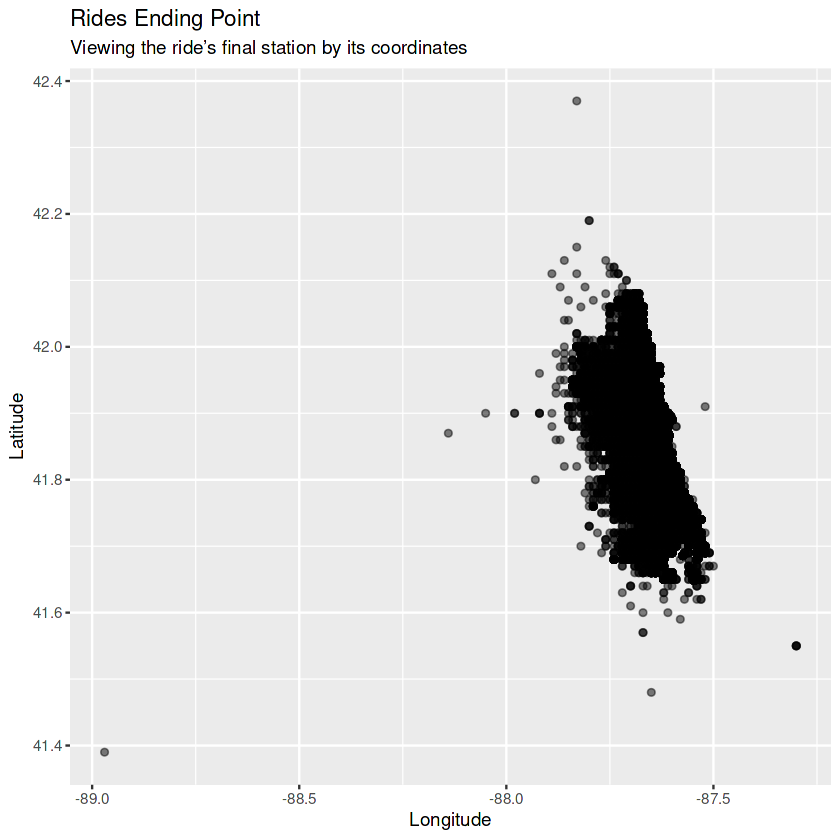

In [47]:
ggplot(merged_tripdata) +
geom_point(mapping=aes(x = end_lng, y = end_lat), alpha = .5) +
labs(title="Rides Ending Point", subtitle="Viewing the ride’s final station by its coordinates", x="Longitude", y="Latitude")

There are a few rides that we should examine.

In [48]:
filter(merged_tripdata, end_lat > -87.5 & end_lat < 41.6)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,⋯,ride_duration,ride_year,ride_month,week_day,start_hour,end_hour,ride_distance,ride_speed,to_exclude,failed_ride
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
868D605CA8265D9C,electric_bike,2022-09-26 12:08:48,2022-09-26 15:37:11,,,,,41.79000,-87.60000,⋯,208.38,2022,Sep,Mon,12,15,36.53,0.1753,FALSE,FALSE
FCA626E6201EA16B,electric_bike,2022-09-26 12:06:12,2022-09-26 15:35:14,,,,,41.79000,-87.60000,⋯,209.03,2022,Sep,Mon,12,15,36.53,0.1748,FALSE,FALSE
D2A9A1120A165B1F,electric_bike,2022-09-26 12:09:30,2022-09-26 15:36:24,Ellis Ave & 55th St,KA1504000076,,,41.79432,-87.60140,⋯,206.90,2022,Sep,Mon,12,15,36.96,0.1786,FALSE,FALSE
61B5DF7BA9C8D20B,electric_bike,2022-09-26 12:16:37,2022-09-26 15:37:25,,,,,41.79000,-87.60000,⋯,200.80,2022,Sep,Mon,12,15,36.53,0.1819,FALSE,FALSE
1A4090C105D4202F,electric_bike,2022-10-08 19:10:35,2022-10-08 20:15:38,,,,,41.71000,-87.65000,⋯,65.05,2022,Oct,Sat,19,20,14.55,0.2237,FALSE,FALSE
9F438AD0AB380E3F,electric_bike,2021-11-09 06:47:52,2021-11-09 07:42:56,Narragansett & McLean,309,,,41.92000,-87.79000,⋯,55.07,2021,Nov,Tue,6,7,114.57,2.0804,FALSE,FALSE
C1FC8F85DC97254B,electric_bike,2021-12-09 22:02:51,2021-12-10 00:23:34,Western Ave & 104th St,20123,,,41.70459,-87.68116,⋯,140.72,2021,Dec,Thu,22,0,14.98,0.1065,FALSE,FALSE
3562D6656F11B167,electric_bike,2021-12-25 10:22:39,2021-12-25 14:28:56,Western Ave & 111th St,20205,,,41.69121,-87.68131,⋯,246.28,2021,Dec,Sat,10,14,23.60,0.0958,FALSE,FALSE
858F8EA47B69014D,electric_bike,2021-12-04 12:36:17,2021-12-04 14:28:14,Western Ave & 111th St,20205,,,41.69126,-87.68129,⋯,111.95,2021,Dec,Sat,12,14,13.50,0.1206,FALSE,FALSE


There are 9 cases on the ending point, all of them with electric bike and very low ride speed. 
We will filter them out.

In [49]:
filter(merged_tripdata, end_lat < 41.4 | end_lat > 42.3)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,⋯,ride_duration,ride_year,ride_month,week_day,start_hour,end_hour,ride_distance,ride_speed,to_exclude,failed_ride
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
5CE2D7C544D25B78,electric_bike,2022-07-13 13:51:38,2022-07-13 18:02:44,Chicago Ave & Sheridan Rd,E008,,,42.05043,-87.67788,⋯,251.10,2022,Jul,Wed,13,18,37.65,0.1499,FALSE,FALSE
9F438AD0AB380E3F,electric_bike,2021-11-09 06:47:52,2021-11-09 07:42:56,Narragansett & McLean,309,,,41.92000,-87.79000,⋯,55.07,2021,Nov,Tue,6,7,114.57,2.0804,FALSE,FALSE


Let's exclude these cases as well.

In [50]:
merged_tripdata <- mutate(merged_tripdata,to_exclude=((ride_duration < 0 | start_lng > -76 | end_lat < 41.4 | end_lat > 42.3) | (end_lat > -87.5 & end_lat < 41.6)))

In [51]:
filter(merged_tripdata, to_exclude)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,⋯,ride_duration,ride_year,ride_month,week_day,start_hour,end_hour,ride_distance,ride_speed,to_exclude,failed_ride
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
3327172413547F64,electric_bike,2022-01-14 11:13:15,2022-01-14 11:15:50,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,45.63503,-73.79648,⋯,2.58,2022,Jan,Fri,11,11,1192.25,462.1124,TRUE,FALSE
2D97E3C98E165D80,classic_bike,2022-03-05 11:00:57,2022-03-05 10:55:01,DuSable Lake Shore Dr & Wellington Ave,TA1307000041,DuSable Lake Shore Dr & Wellington Ave,TA1307000041,41.93669,-87.63683,⋯,-5.93,2022,Mar,Sat,11,10,0.00,0.0000,TRUE,FALSE
7407049C5D89A13D,electric_bike,2022-03-05 11:38:04,2022-03-05 11:37:57,Sheffield Ave & Wellington Ave,TA1307000052,Sheffield Ave & Wellington Ave,TA1307000052,41.93631,-87.65252,⋯,-0.12,2022,Mar,Sat,11,11,0.01,-0.0833,TRUE,FALSE
0793C9208A64302A,electric_bike,2022-05-30 11:06:29,2022-05-30 11:06:17,Broadway & Waveland Ave,13325,,,41.94907,-87.64850,⋯,-0.20,2022,May,Mon,11,11,0.16,-0.8000,TRUE,FALSE
B897BE02B21FA75E,electric_bike,2022-06-07 19:15:39,2022-06-07 17:05:37,,,Kostner Ave & North Ave,519,41.90000,-87.74000,⋯,-130.03,2022,Jun,Tue,19,17,1.11,-0.0085,TRUE,FALSE
072E947E156D142D,electric_bike,2022-06-07 19:14:46,2022-06-07 17:07:45,W Armitage Ave & N Sheffield Ave,20254.0,W Armitage Ave & N Sheffield Ave,20254.0,41.92000,-87.65000,⋯,-127.02,2022,Jun,Tue,19,17,0.00,0.0000,TRUE,FALSE
6A871510E302E8CD,electric_bike,2022-06-23 19:22:57,2022-06-23 19:21:46,,,Green St & Randolph St*,chargingstx3,41.88000,-87.65000,⋯,-1.18,2022,Jun,Thu,19,19,0.42,-0.3559,TRUE,FALSE
BF114472ABA0289C,electric_bike,2022-06-07 19:14:47,2022-06-07 17:05:42,Base - 2132 W Hubbard,Hubbard Bike-checking (LBS-WH-TEST),W Armitage Ave & N Sheffield Ave,20254.0,41.91783,-87.65336,⋯,-129.08,2022,Jun,Tue,19,17,0.37,-0.0029,TRUE,FALSE
B3BE8FE661F79405,electric_bike,2022-06-07 16:18:37,2022-06-07 16:07:28,,,Clinton St & Washington Blvd,WL-012,41.88000,-87.64000,⋯,-11.15,2022,Jun,Tue,16,16,0.39,-0.0350,TRUE,FALSE


We have 123 rides and not 124 due to one overlap.

Let's run a summary for examining a few more outliers

In [52]:
summary(merged_tripdata)

   ride_id          rideable_type        started_at                 
 Length:5755694     Length:5755694     Min.   :2021-11-01 00:00:14  
 Class :character   Class :character   1st Qu.:2022-04-27 16:40:09  
 Mode  :character   Mode  :character   Median :2022-06-30 18:31:03  
                                       Mean   :2022-06-13 23:04:32  
                                       3rd Qu.:2022-08-24 19:52:19  
                                       Max.   :2022-10-31 23:59:33  
                                                                    
    ended_at                   start_station_name start_station_id  
 Min.   :2021-11-01 00:04:06   Length:5755694     Length:5755694    
 1st Qu.:2022-04-27 16:51:40   Class :character   Class :character  
 Median :2022-06-30 18:49:28   Mode  :character   Mode  :character  
 Mean   :2022-06-13 23:23:58                                        
 3rd Qu.:2022-08-24 20:10:05                                        
 Max.   :2022-11-07 04:53:58      

We have the following to examine: 

max(ride_duration) = 41387.25 (the negative values will be excluded)

end_lng/end_lat have 5835 NA 

failed_ride has 4 NA

max(ride_distance) = 1192.25

In [53]:
filter(merged_tripdata, ride_distance>100)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,⋯,ride_duration,ride_year,ride_month,week_day,start_hour,end_hour,ride_distance,ride_speed,to_exclude,failed_ride
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
3327172413547F64,electric_bike,2022-01-14 11:13:15,2022-01-14 11:15:50,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,45.63503,-73.79648,⋯,2.58,2022,Jan,Fri,11,11,1192.25,462.1124,TRUE,FALSE
9F438AD0AB380E3F,electric_bike,2021-11-09 06:47:52,2021-11-09 07:42:56,Narragansett & McLean,309,,,41.92000,-87.79000,⋯,55.07,2021,Nov,Tue,6,7,114.57,2.0804,TRUE,FALSE


Warning message:
“Removed 5835 rows containing missing values (geom_point).”


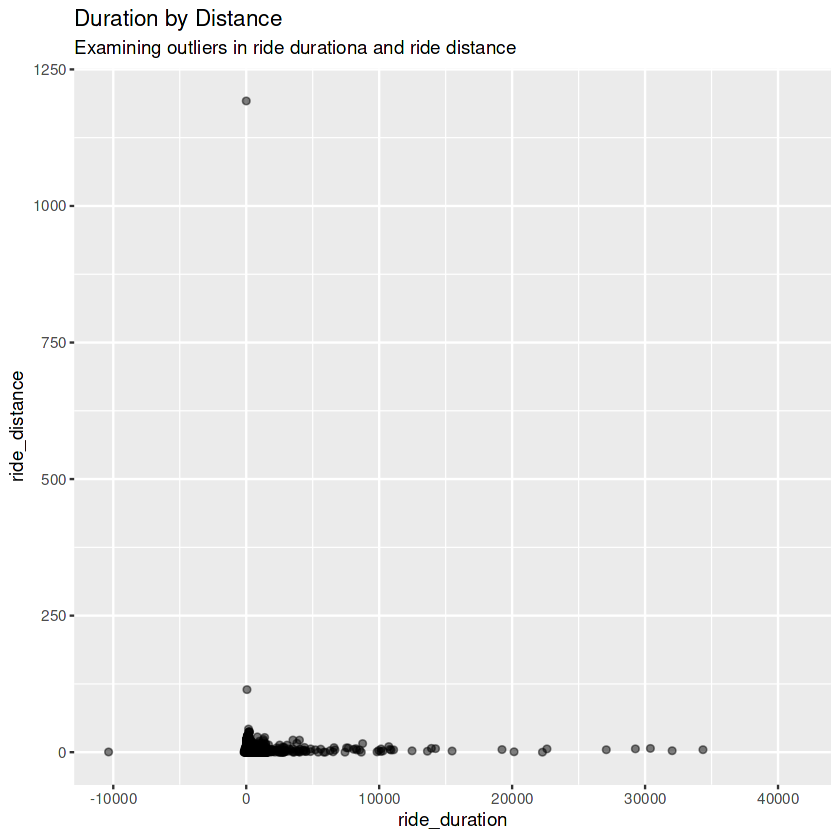

In [54]:
ggplot(merged_tripdata) +
geom_point(mapping=aes(x = ride_duration, y = ride_distance), alpha = .5) +
labs(title="Duration by Distance", subtitle="Examining outliers in ride durationa and ride distance", x="ride_duration", y="ride_distance")

In [55]:
filter(merged_tripdata, ride_distance>100)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,⋯,ride_duration,ride_year,ride_month,week_day,start_hour,end_hour,ride_distance,ride_speed,to_exclude,failed_ride
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
3327172413547F64,electric_bike,2022-01-14 11:13:15,2022-01-14 11:15:50,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,45.63503,-73.79648,⋯,2.58,2022,Jan,Fri,11,11,1192.25,462.1124,TRUE,FALSE
9F438AD0AB380E3F,electric_bike,2021-11-09 06:47:52,2021-11-09 07:42:56,Narragansett & McLean,309,,,41.92000,-87.79000,⋯,55.07,2021,Nov,Tue,6,7,114.57,2.0804,TRUE,FALSE


As we can see, they are already signed for being excluded.

In [56]:
filter(merged_tripdata, ride_duration>15000)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,⋯,ride_duration,ride_year,ride_month,week_day,start_hour,end_hour,ride_distance,ride_speed,to_exclude,failed_ride
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
5EE2D7C533CCC17B,docked_bike,2022-01-06 19:07:45,2022-01-25 14:30:33,Wabash Ave & Grand Ave,TA1307000117,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.89147,-87.62676,⋯,27082.80,2022,Jan,Thu,19,14,4.48,2e-04,FALSE,FALSE
578BA30BA1348F18,docked_bike,2022-01-01 01:00:05,2022-01-21 08:51:11,Millennium Park,13008,Fairfield Ave & Roosevelt Rd,KA1504000102,41.88103,-87.62408,⋯,29271.10,2022,Jan,Sat,1,8,6.06,2e-04,FALSE,FALSE
5679434466A48868,docked_bike,2022-01-01 01:23:25,2022-01-19 10:02:17,Clark St & Grace St,TA1307000127,,,41.95078,-87.65917,⋯,26438.87,2022,Jan,Sat,1,10,NA,NA,NA,FALSE
23697816035F9A8F,docked_bike,2022-03-05 19:08:58,2022-03-29 15:43:02,Sheffield Ave & Fullerton Ave,TA1306000016,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.92560,-87.65371,⋯,34354.07,2022,Mar,Sat,19,15,4.55,1e-04,FALSE,FALSE
368F127C65AA35B2,docked_bike,2022-04-15 16:53:06,2022-04-29 14:19:28,Rush St & Superior St,15530,,,41.89576,-87.62591,⋯,20006.37,2022,Apr,Fri,16,14,NA,NA,NA,FALSE
6100E50D31240C71,docked_bike,2022-04-10 12:10:39,2022-04-22 04:17:03,Lincoln Park Conservatory,LP-,,,41.92393,-87.63582,⋯,16806.40,2022,Apr,Sun,12,4,NA,NA,NA,FALSE
CEC1B05EC73795C4,docked_bike,2022-04-12 15:27:28,2022-04-27 07:29:40,Wabash Ave & Grand Ave,TA1307000117,,,41.89147,-87.62676,⋯,21122.20,2022,Apr,Tue,15,7,NA,NA,NA,FALSE
FE517B3CBB5A5BF0,docked_bike,2022-05-13 21:49:47,2022-05-25 14:55:13,Kedzie Ave & Roosevelt Rd,15682,,,41.86649,-87.70650,⋯,16865.43,2022,May,Fri,21,14,NA,NA,NA,FALSE
EBE836D0E4C50379,docked_bike,2022-05-14 00:05:15,2022-05-24 15:20:33,Sheridan Rd & Montrose Ave,TA1307000107,,,41.96167,-87.65464,⋯,15315.30,2022,May,Sat,0,15,NA,NA,NA,FALSE


We can see that many of them are docked bikes. Let's see if there are any other bike types with high ride duration. 

In [57]:
filter(merged_tripdata, ride_duration>1500 & rideable_type != 'docked_bike')

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,⋯,ride_duration,ride_year,ride_month,week_day,start_hour,end_hour,ride_distance,ride_speed,to_exclude,failed_ride
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
F58BEEE9B2DF61F2,classic_bike,2022-01-27 17:08:48,2022-01-28 18:09:09,Wells St & Concord Ln,TA1308000050,,,41.91213,-87.63466,⋯,1500.35,2022,Jan,Thu,17,18,NA,NA,NA,FALSE
96BA420816B4FFBC,classic_bike,2022-03-12 11:07:44,2022-03-13 13:07:25,Peoria St & Jackson Blvd,13158,,,41.87764,-87.64962,⋯,1559.68,2022,Mar,Sat,11,13,1.37,9e-04,FALSE,FALSE
160DC96A63BC2DC5,classic_bike,2022-03-12 20:06:02,2022-03-13 22:05:56,Larrabee St & Armitage Ave,TA1309000006,,,41.91808,-87.64375,⋯,1559.90,2022,Mar,Sat,20,22,NA,NA,NA,FALSE
6C45D457B323DF2D,classic_bike,2022-03-12 20:57:33,2022-03-13 22:57:27,Clark St & Lincoln Ave,13179,,,41.91569,-87.63460,⋯,1559.90,2022,Mar,Sat,20,22,NA,NA,NA,FALSE
26AEB11377094D96,classic_bike,2022-03-12 16:47:21,2022-03-13 18:47:17,Halsted St & 69th St,15597,,,41.76906,-87.64461,⋯,1559.93,2022,Mar,Sat,16,18,NA,NA,NA,FALSE
F906BD271EC6D97C,classic_bike,2022-04-28 10:49:46,2022-04-29 11:50:13,Wentworth Ave & Cermak Rd,13075,,,41.85308,-87.63193,⋯,1500.45,2022,Apr,Thu,10,11,NA,NA,NA,FALSE
6CF15F61A9744F9E,classic_bike,2022-04-12 15:30:50,2022-04-13 16:31:17,Walden Pkwy & 100th St,20107,,,41.71216,-87.66773,⋯,1500.45,2022,Apr,Tue,15,16,NA,NA,NA,FALSE
545479AF53C05BB5,classic_bike,2022-05-27 23:41:41,2022-05-29 00:42:04,Rush St & Superior St,15530,,,41.89576,-87.62591,⋯,1500.38,2022,May,Fri,23,0,NA,NA,NA,FALSE
F361E9AD629B88B2,classic_bike,2022-05-08 14:54:33,2022-05-09 15:55:05,Vernon Ave & 107th St,20109,,,41.70012,-87.61226,⋯,1500.53,2022,May,Sun,14,15,NA,NA,NA,FALSE


After filtering a few durations, we saw that ride_duration > 1560 are docked_bike only.

Warning message:
“Removed 5835 rows containing missing values (geom_point).”


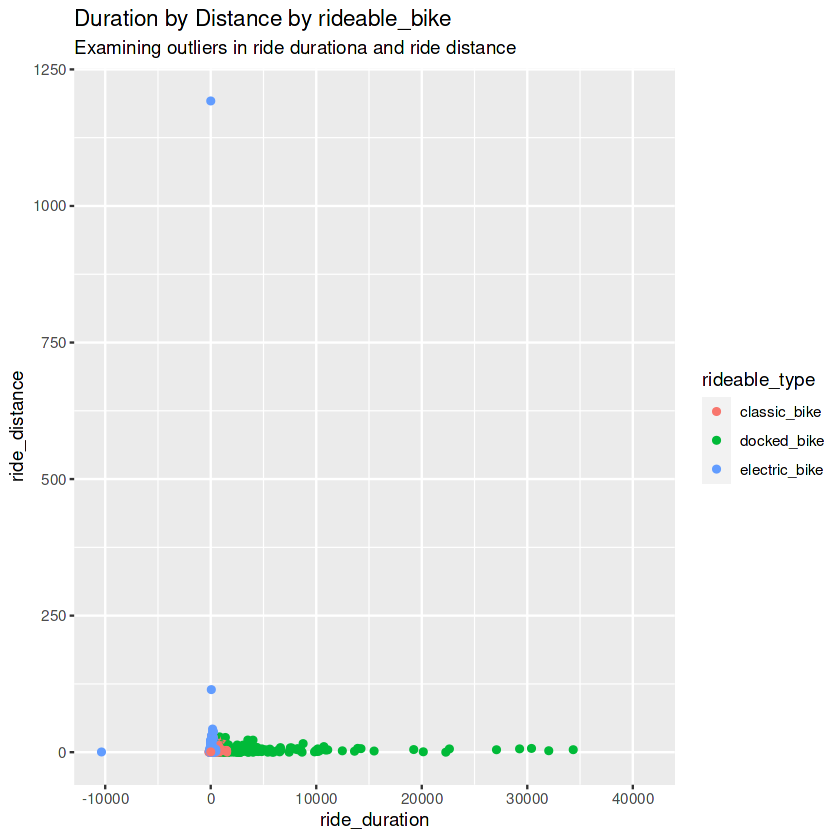

In [59]:
ggplot(merged_tripdata, aes(x = ride_duration, y = ride_distance, col = rideable_type)) +
geom_point() + 
labs(title="Duration by Distance by rideable_bike", subtitle="Examining outliers in ride durationa and ride distance", x="ride_duration", y="ride_distance")

It will be easier to process the final cleaned dataset.

Let's run the final examines for the NA values and decide of to exclude them as well

In [60]:
filter(merged_tripdata, is.na(failed_ride))

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,⋯,ride_duration,ride_year,ride_month,week_day,start_hour,end_hour,ride_distance,ride_speed,to_exclude,failed_ride
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
1D1C7350BA9015D5,docked_bike,2022-07-23 15:47:33,2022-07-23 15:48:08,Streeter Dr & Grand Ave,13022,,,41.89228,-87.61204,⋯,0.58,2022,Jul,Sat,15,15,NA,NA,NA,NA
EBEA9AFBA3820131,docked_bike,2022-08-10 10:56:02,2022-08-10 10:56:59,Streeter Dr & Grand Ave,13022,,,41.89228,-87.61204,⋯,0.95,2022,Aug,Wed,10,10,NA,NA,NA,NA
7E77111AF78836E5,classic_bike,2021-11-30 19:06:31,2021-11-30 19:06:37,Lakeview Ave & Fullerton Pkwy,TA1309000019,,,41.92586,-87.63897,⋯,0.10,2021,Nov,Tue,19,19,NA,NA,NA,NA
9051AE039095AAC7,classic_bike,2021-11-17 12:01:30,2021-11-17 12:01:36,Cityfront Plaza Dr & Pioneer Ct,13427,,,41.89057,-87.62207,⋯,0.10,2021,Nov,Wed,12,12,NA,NA,NA,NA


In [61]:
filter(merged_tripdata, is.na(end_lat))

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,⋯,ride_duration,ride_year,ride_month,week_day,start_hour,end_hour,ride_distance,ride_speed,to_exclude,failed_ride
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
C1AB102E01C34020,classic_bike,2022-01-26 16:56:03,2022-01-27 17:55:56,Michigan Ave & Jackson Blvd,TA1309000002,,,41.87785,-87.62408,⋯,1499.88,2022,Jan,Wed,16,17,NA,NA,NA,FALSE
1A51C738B3CD1B3A,classic_bike,2022-01-10 18:50:12,2022-01-11 19:50:05,Western Ave & Leland Ave,TA1307000140,,,41.96640,-87.68870,⋯,1499.88,2022,Jan,Mon,18,19,NA,NA,NA,FALSE
17BC9F8B24C3D9B7,classic_bike,2022-01-25 21:38:09,2022-01-26 22:38:04,Christiana Ave & Lawrence Ave,15615,,,41.96835,-87.71183,⋯,1499.92,2022,Jan,Tue,21,22,NA,NA,NA,FALSE
6C05E25B083BCA23,classic_bike,2022-01-15 15:10:21,2022-01-16 16:10:14,Theater on the Lake,TA1308000001,,,41.92628,-87.63083,⋯,1499.88,2022,Jan,Sat,15,16,NA,NA,NA,FALSE
AF572A09F5BF185F,classic_bike,2022-01-19 00:54:32,2022-01-20 01:54:25,Kedzie Ave & Milwaukee Ave,13085,,,41.92957,-87.70786,⋯,1499.88,2022,Jan,Wed,0,1,NA,NA,NA,FALSE
44BA6450D101D20A,classic_bike,2022-01-29 17:52:46,2022-01-30 18:52:39,Sheffield Ave & Fullerton Ave,TA1306000016,,,41.92560,-87.65371,⋯,1499.88,2022,Jan,Sat,17,18,NA,NA,NA,FALSE
65C04E49DB727716,docked_bike,2022-01-20 23:21:32,2022-01-21 07:44:57,Eckhart Park,13289,,,41.89637,-87.66098,⋯,503.42,2022,Jan,Thu,23,7,NA,NA,NA,FALSE
4A4EB35340B2096A,classic_bike,2022-01-18 14:17:15,2022-01-19 15:17:11,Spaulding Ave & Armitage Ave,15650,,,41.91711,-87.71022,⋯,1499.93,2022,Jan,Tue,14,15,NA,NA,NA,FALSE
2722AB8C98FD0D86,docked_bike,2022-01-29 05:38:04,2022-01-29 05:58:51,Ashland Ave & Division St,13061,,,41.90345,-87.66775,⋯,20.78,2022,Jan,Sat,5,5,NA,NA,NA,FALSE


There are 5835 rides that do not have the end station.

We should exclude them: first, it prevents us from getting values in other important variables. Secondly, it's less than 1% of the data and shouldn't compromise the accuracy of the analysis.

We should to these cases the following rides: rides that haven't started (ride_duration = 0), and outliers in ride_durantion (ride_duration > 1560) which are doced_cike only.

In [73]:
merged_tripdata <- mutate(merged_tripdata,to_exclude=((is.na(end_lat) | ride_duration < 0 | ride_duration == 0 | ride_duration > 1560 | start_lng > -76 | end_lat < 41.4 | end_lat > 42.3) | (end_lat > -87.5 & end_lat < 41.6)))

In [74]:
filter(merged_tripdata, to_exclude == 'TRUE')

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,⋯,ride_duration,ride_year,ride_month,week_day,start_hour,end_hour,ride_distance,ride_speed,to_exclude,failed_ride
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
75B575F78EC8BA7A,docked_bike,2022-01-10 16:20:31,2022-01-12 09:38:15,Shedd Aquarium,15544,Shedd Aquarium,15544,41.86723,-87.61535,⋯,2477.73,2022,Jan,Mon,16,9,0.00,0.0000,TRUE,FALSE
3327172413547F64,electric_bike,2022-01-14 11:13:15,2022-01-14 11:15:50,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,Pawel Bialowas - Test- PBSC charging station,45.63503,-73.79648,⋯,2.58,2022,Jan,Fri,11,11,1192.25,462.1124,TRUE,FALSE
C1AB102E01C34020,classic_bike,2022-01-26 16:56:03,2022-01-27 17:55:56,Michigan Ave & Jackson Blvd,TA1309000002,,,41.87785,-87.62408,⋯,1499.88,2022,Jan,Wed,16,17,NA,NA,TRUE,FALSE
1A51C738B3CD1B3A,classic_bike,2022-01-10 18:50:12,2022-01-11 19:50:05,Western Ave & Leland Ave,TA1307000140,,,41.96640,-87.68870,⋯,1499.88,2022,Jan,Mon,18,19,NA,NA,TRUE,FALSE
17BC9F8B24C3D9B7,classic_bike,2022-01-25 21:38:09,2022-01-26 22:38:04,Christiana Ave & Lawrence Ave,15615,,,41.96835,-87.71183,⋯,1499.92,2022,Jan,Tue,21,22,NA,NA,TRUE,FALSE
6C05E25B083BCA23,classic_bike,2022-01-15 15:10:21,2022-01-16 16:10:14,Theater on the Lake,TA1308000001,,,41.92628,-87.63083,⋯,1499.88,2022,Jan,Sat,15,16,NA,NA,TRUE,FALSE
AF572A09F5BF185F,classic_bike,2022-01-19 00:54:32,2022-01-20 01:54:25,Kedzie Ave & Milwaukee Ave,13085,,,41.92957,-87.70786,⋯,1499.88,2022,Jan,Wed,0,1,NA,NA,TRUE,FALSE
44BA6450D101D20A,classic_bike,2022-01-29 17:52:46,2022-01-30 18:52:39,Sheffield Ave & Fullerton Ave,TA1306000016,,,41.92560,-87.65371,⋯,1499.88,2022,Jan,Sat,17,18,NA,NA,TRUE,FALSE
65C04E49DB727716,docked_bike,2022-01-20 23:21:32,2022-01-21 07:44:57,Eckhart Park,13289,,,41.89637,-87.66098,⋯,503.42,2022,Jan,Thu,23,7,NA,NA,TRUE,FALSE


Great, the total rides excluded are summing up in 6533 as it should.

Let's build the final cleaned dataset

In [75]:
cleaned_tripdata <- filter(merged_tripdata, to_exclude == 'FALSE')

In [76]:
summary(cleaned_tripdata)

   ride_id          rideable_type        started_at                 
 Length:5749161     Length:5749161     Min.   :2021-11-01 00:00:14  
 Class :character   Class :character   1st Qu.:2022-04-27 16:23:36  
 Mode  :character   Mode  :character   Median :2022-06-30 18:30:29  
                                       Mean   :2022-06-13 22:54:26  
                                       3rd Qu.:2022-08-24 19:56:24  
                                       Max.   :2022-10-31 23:59:33  
    ended_at                   start_station_name start_station_id  
 Min.   :2021-11-01 00:04:06   Length:5749161     Length:5749161    
 1st Qu.:2022-04-27 16:32:31   Class :character   Class :character  
 Median :2022-06-30 18:47:15   Mode  :character   Mode  :character  
 Mean   :2022-06-13 23:10:46                                        
 3rd Qu.:2022-08-24 20:11:09                                        
 Max.   :2022-11-01 08:59:46                                        
 end_station_name   end_station_id

In [77]:
head(cleaned_tripdata)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,⋯,ride_duration,ride_year,ride_month,week_day,start_hour,end_hour,ride_distance,ride_speed,to_exclude,failed_ride
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
1,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01280,-87.66591,⋯,2.95,2022,Jan,Thu,11,12,0.70,0.2373,FALSE,FALSE
2,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.01276,-87.66597,⋯,4.35,2022,Jan,Mon,8,8,0.70,0.1609,FALSE,FALSE
3,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.92560,-87.65371,⋯,4.35,2022,Jan,Tue,4,4,1.00,0.2299,FALSE,FALSE
4,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.98359,-87.66915,⋯,14.93,2022,Jan,Tue,0,0,2.46,0.1648,FALSE,FALSE
5,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.87785,-87.62408,⋯,6.03,2022,Jan,Thu,1,1,0.81,0.1343,FALSE,FALSE
6,A39C6F6CC0586C0B,classic_bike,2022-01-11 18:48:09,2022-01-11 18:51:31,Wood St & Chicago Ave,637,Honore St & Division St,TA1305000034,41.89563,-87.67207,⋯,3.37,2022,Jan,Tue,18,18,0.85,0.2522,FALSE,FALSE


We can see that there are no NA's and no outliers. 

We are ready to save the final cleaned dataset.

In [78]:
write.csv(cleaned_tripdata, "cleaned_tripdata.csv")

We'll continue the analysis step on Tableau.